In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
startup=pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatter plot between variables along with histograms

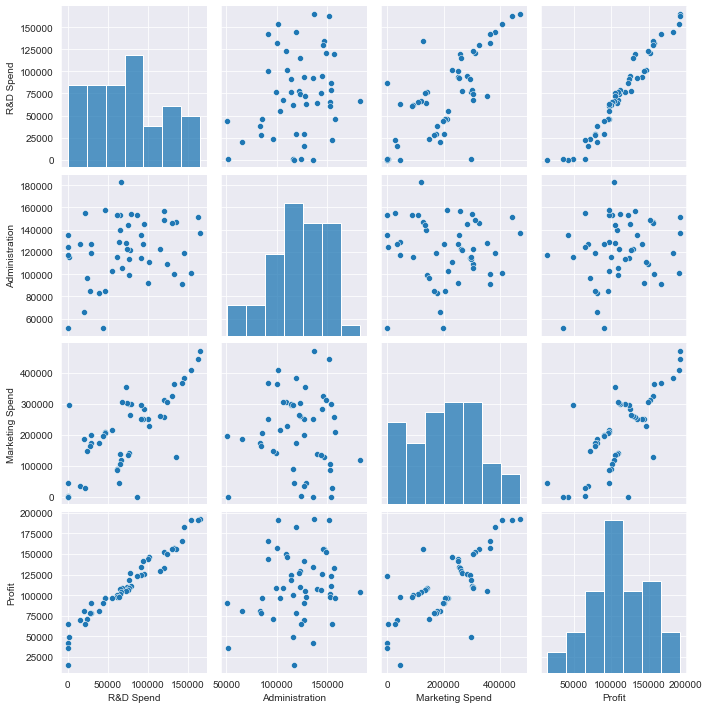

In [6]:
sns.set_style(style="darkgrid")
sns.pairplot(startup)

# preparing model

In [7]:
import statsmodels.formula.api as smf


In [10]:
startup= startup.drop(['State'], axis=1)
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [15]:
startup.rename({'R&D Spend': 'rnd_spend'}, axis=1, inplace=True)
startup.rename({'Administration': 'admin_spend'}, axis=1, inplace=True)
startup.rename({'Marketing Spend': 'market_spend'}, axis=1, inplace=True)
startup.rename({'Profit': 'profit'}, axis=1, inplace=True)
startup.head()

,rnd_spend,admin_spend,market_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [16]:
model=smf.ols('profit~ rnd_spend+admin_spend+market_spend', data=startup).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        00:37:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnd_spend        0.8057      0.045     17.846      0.000       0.715       0.897
admin_spend     -0.0268      0.051     -0.526      0.602      -0.130       0.076
market_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model1=smf.ols('profit~ rnd_spend+market_spend', data=startup).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.16e-31
Time:                        00:40:02   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rnd_spend        0.7966      0.041     19.266      0.000       0.713       0.880
market_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# check for the residuals

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


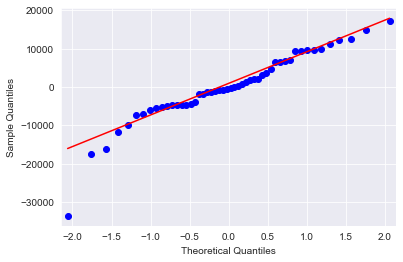

In [20]:
import statsmodels.api as sm
sm.qqplot(model1.resid, line='q')
plt.show()

# residual plot for homo scadasticity

In [21]:
def get_std_val(val):
    return ((val-val.mean())/val.std())

Text(0.5, 1.0, 'residual plot for homoscadasticity')

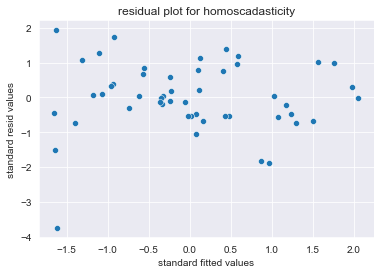

In [25]:
sns.set_style('darkgrid')
sns.scatterplot(x=get_std_val(model1.fittedvalues), y=get_std_val(model.resid), data=startup )
plt.xlabel('standard fitted values')
plt.ylabel('standard resid values')
plt.title('residual plot for homoscadasticity')

# residual regression plot check
for market_spend parameter

<function matplotlib.pyplot.show(close=None, block=None)>

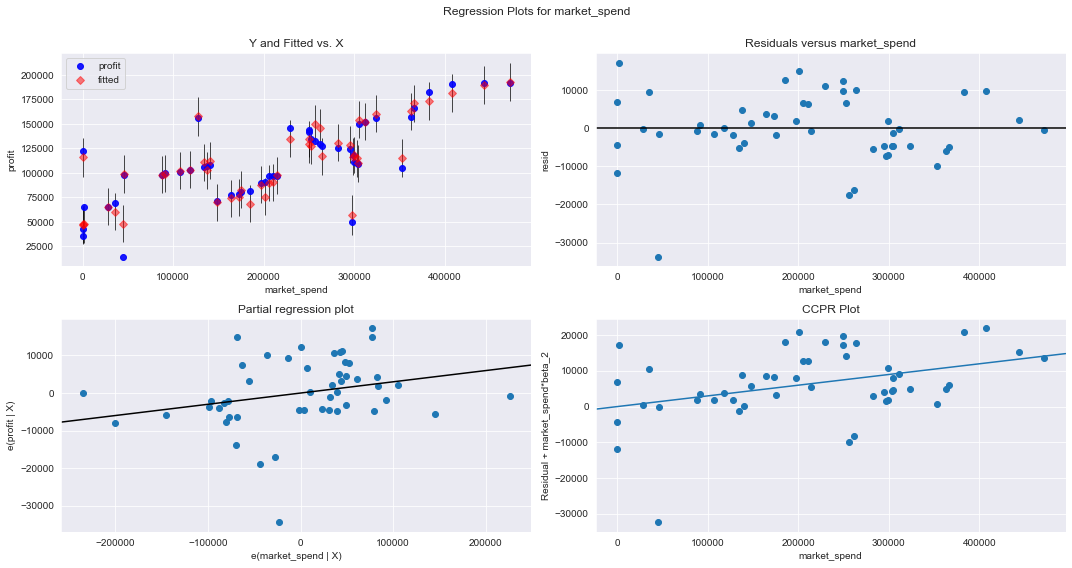

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'market_spend', fig=fig)
plt.show

# for rnd_spend parameter

<function matplotlib.pyplot.show(close=None, block=None)>

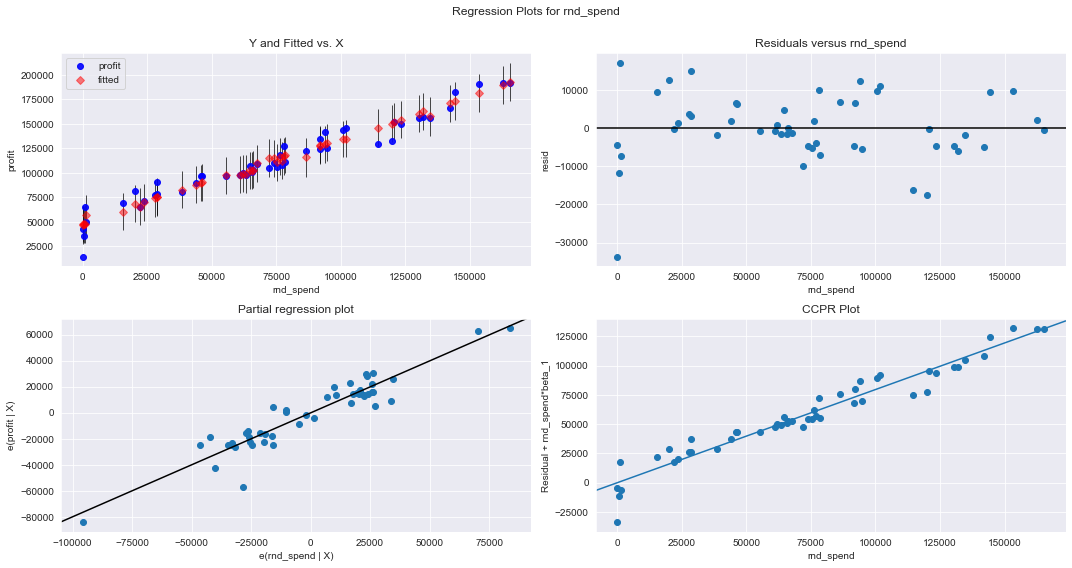

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'rnd_spend', fig=fig)
plt.show

# checking the cooks distance using stem plot

In [28]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

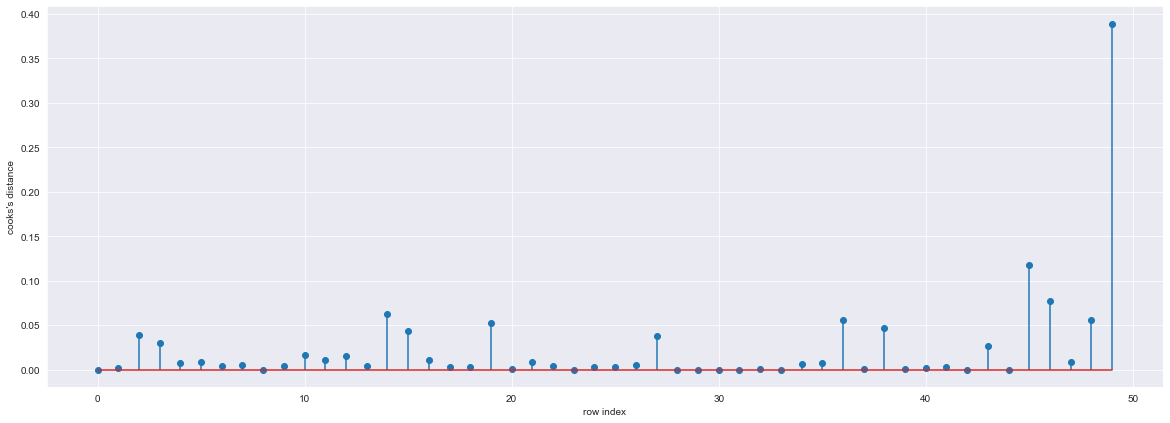

In [30]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)), np.round(c,3))
plt.xlabel('row index')
plt.ylabel("cooks's distance")
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(49, 0.3894886227924924)

# checking the high influence points using the bubble plot

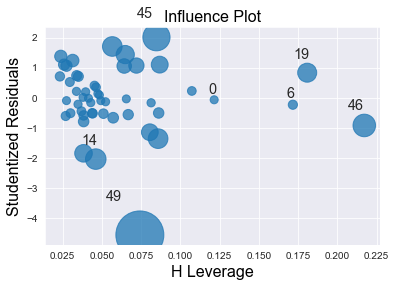

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [36]:
startup1=startup.drop(startup.index[49], axis=0).reset_index()
startup.shape

(50, 4)

# Rebuilding the Model

In [41]:
model2=smf.ols('profit~market_spend+rnd_spend', data=startup1).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           3.74e-33
Time:                        00:58:59   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
market_spend     0.0274      0.013      2.104      0.041       0.001       0.054
rnd_spend        0.7754      0.035     22.136      0.000       0.705       0.846
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# model prediction

In [40]:
pred=model2.predict(startup1)
pred

0     192800.458625
1     189774.659480
2     181405.378097
3     173441.308842
4     171127.623218
5     162879.310812
6     158028.130454
7     160455.738877
8     152317.803673
9     154343.813935
10    135011.914724
11    134638.870075
12    129218.396579
13    127812.205465
14    150192.491797
15    146032.715433
16    117025.891848
17    130829.444732
18    128882.198828
19    115816.418333
20    116650.892092
21    118384.170709
22    114990.384639
23    109886.185217
24    112552.187151
25    102612.909242
26    110990.792884
27    114978.605150
28    103125.012760
29    102440.424090
30     99085.219562
31     98314.548854
32     98864.662254
33     97600.730445
34     90262.641219
35     89776.494285
36     75824.233912
37     87974.014518
38     68631.318323
39     82924.815275
40     75049.056031
41     74113.888705
42     70234.250574
43     60390.232852
44     65489.729308
45     47829.573980
46     56909.800859
47     46975.864221
48     47407.652602
dtype: float64

In [42]:
new_data=pd.DataFrame({'market_spend':65000,'rnd_spend':95000}, index=[0])
new_data

,market_spend,rnd_spend
0,65000,95000


In [43]:
model2.predict(new_data)

0    125230.695101
dtype: float64